In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [9]:
#summary 
# we have data frame consisting of 9827 rows and 9 columns 
#genre columns has comma and seperated values and white spaces we need to remove it
# this is the method of preprocessing...

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


now the step is dropping  the columns

In [13]:
columns = ['Overview','Original_Language', 'Poster_Url']

In [14]:
df.drop(columns, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


we haev to the next step as vote average is given in int so we have to convert it into label as average,  below average, Good 

In [16]:
def categorize_colm(df, colm, labels):
    edges = [df[colm].describe()['min'], 
             df[colm].describe()['25%'], 
             df[colm].describe()['50%'], 
             df[colm].describe()['75%'], 
             df[colm].describe()['max']]
    df[colm] = pd.cut(df[colm], edges, labels = labels, duplicates = 'drop')
    return df
             

In [17]:
labels = ['Bad', 'below_average', 'average', 'Good']

categorize_colm(df, 'Vote_Average', labels)
df['Vote_Average'].unique()


['Good', 'below_average', 'average', 'Bad', NaN]
Categories (4, object): ['Bad' < 'below_average' < 'average' < 'Good']

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Good,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,Good,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [19]:
df['Vote_Average'].value_counts()

Vote_Average
Bad              2467
Good             2450
average          2412
below_average    2398
Name: count, dtype: int64

In [20]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Good,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,Good,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


we will split the genre column into a list and then explode our dataframe to have only one genre per row for each move 

In [22]:
df.tail()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9822,1973,Badlands,13.357,896,Good,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Bad,Horror
9824,2016,The Offering,13.355,94,Bad,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"
9826,1984,Threads,13.354,186,Good,"War, Drama, Science Fiction"


In [23]:
df['Genre'] = df['Genre'].astype(str).str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df['Genre'] = df['Genre'].str.strip() 
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Good,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Good,Science Fiction
3,2022,The Batman,3827.658,1151,Good,Crime
4,2022,The Batman,3827.658,1151,Good,Mystery


In [24]:
#casting columns into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [26]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

#till now we have done preprocessing now we are going to work on visualization 


## DATA VISUALIZATION

In [27]:
sns.set_style('whitegrid')


## what is the most frequent genre of movies released on netflix?

In [28]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

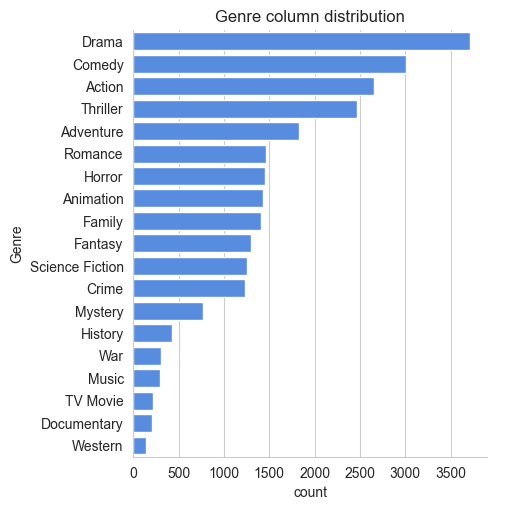

In [32]:
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

## which has highest votes to vote avg column?

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Good,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Good,Science Fiction
3,2022,The Batman,3827.658,1151,Good,Crime
4,2022,The Batman,3827.658,1151,Good,Mystery


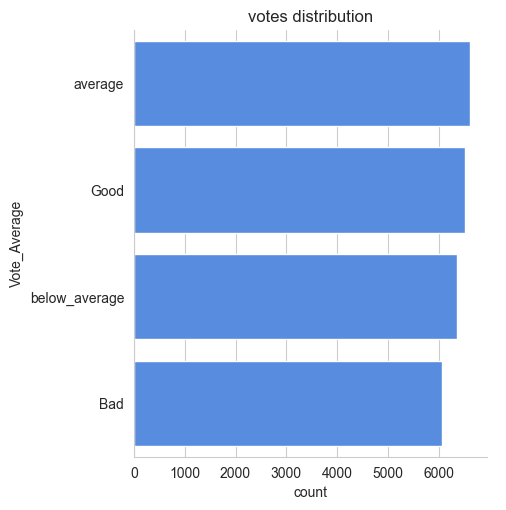

In [41]:
sns.catplot(y ='Vote_Average', data = df, kind = 'count', 
            order = df['Vote_Average'].value_counts().index, 
            color = '#4287f5')
plt.title('votes distribution')
plt.show()

## What movie got the highest popularity? what is the Genre 

In [42]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Good,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Good,Science Fiction


## which movie got low popularity and what its genre?

In [43]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,Good,War
25550,1984,Threads,13.354,186,Good,Drama
25551,1984,Threads,13.354,186,Good,Science Fiction


## which year has the most filmed movies?

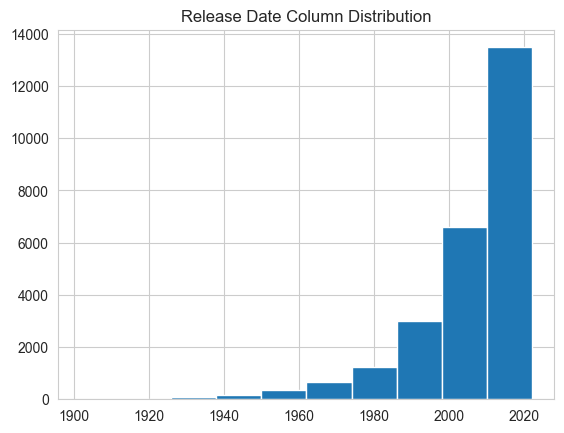

In [46]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

## CONCLUSION--

# Q1: Which genre dominates the dataset in frequency?
The Drama genre emerges as the most prevalent, accounting for over 14% of all entries among 19 distinct genres in the dataset.

# Q2: Which genre has the highest number of votes?
Approximately 25.5% of the dataset, translating to 6,520 entries, represents movies with high audience votes. Once again, the Drama genre leads in popularity, securing more than 18.5% of these votes.

# Q3: Which movie tops the chart in popularity, and what are its genres?
The movie "Spider-Man: No Way Home" holds the crown for the highest popularity in the dataset. Its genres include Adventure and Science Fiction.

# Q4: Which movie ranks lowest in popularity, and what are its genres?
The movie "The United States Thread" records the lowest popularity. Its diverse genre mix includes Music, Drama, War, Science Fiction, and History.

# Q5: Which year witnessed the highest number of film releases?
The year 2020 saw the peak in film production within the dataset, marking it as the most prolific year for movie releases.